# Yakıt fiyatlarının enflasyona etkisi

Buradaki çalışmada daha önce oluşan TL üzerinden petrol fiyatları ve enflasyon ilişkisine bakılacaktır

Barış Sanlı , www.barissanli.com , barissanli2@gmail.com

* Veri tabanından TL, Brent al
* Merkez bankasından TL kur
* Tablo oluştur
* Cor ile ilintiye bak
* Fark oluştur, ilintiye bak
* Oran oluştur ilintiye bak

In [1]:
library(xts)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
veri<-as.xts(readRDS("Final-brent2diesel.rds"))

In [3]:
head(veri)

             WTI Brent LADizel WTI2Dizel Brent2Dizel TP_DK_USD_A
2006-06-15 69.78 66.04   2.105  1.266982    1.992178      1.5897
2006-06-16 69.75 65.01   2.088  1.257290    1.946106      1.5844
2006-06-19 69.21 66.40   2.041  1.238578    1.958133      1.5833
2006-06-20 69.30 67.57   2.048  1.241212    1.996874      1.5942
2006-06-21 70.07 68.17   2.076  1.244356    2.019708      1.6088
2006-06-22 70.62 69.60   2.112  1.256075    2.081495      1.6414
           ABDBrentDizelTL   OTV       KDV   Toplam      Marj
2006-06-15       0.8366239 0.927 0.3462523 2.269876 0.1600000
2006-06-16       0.8145508 0.927 0.3422966 2.243944 0.1600968
2006-06-19       0.8190159 0.927 0.3431525 2.249556 0.1603871
2006-06-20       0.8409696 0.927 0.3471216 2.275575 0.1604839
2006-06-21       0.8583758 0.927 0.3502722 2.296229 0.1605807
2006-06-22       0.9025614 0.927 0.3582430 2.348482 0.1606774

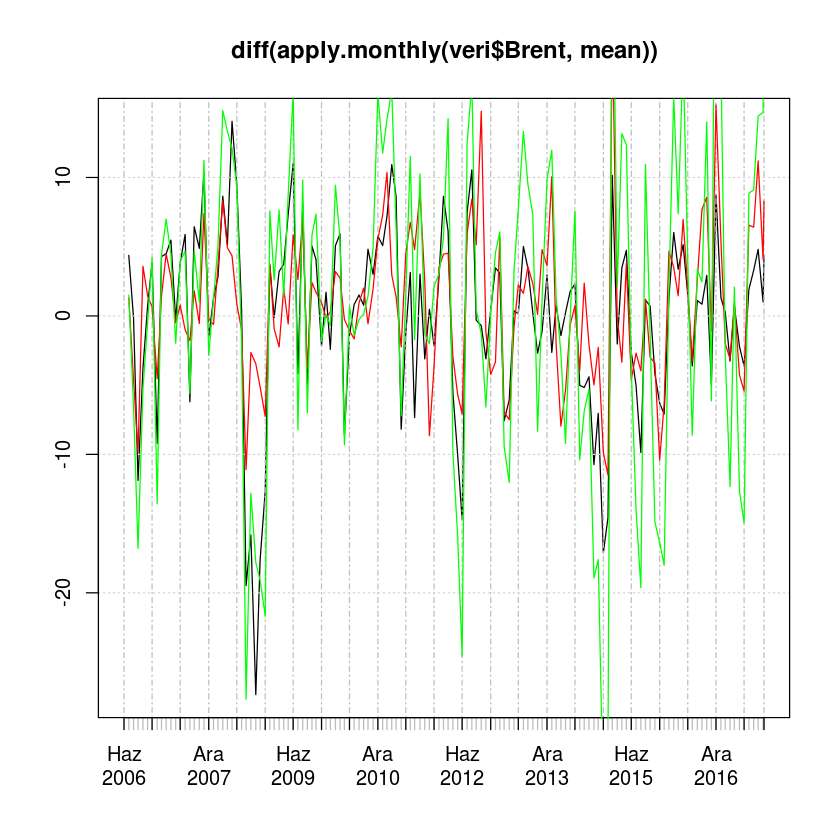

In [17]:
plot(diff(apply.monthly(veri$Brent,mean)))
lines(diff(40*apply.monthly(veri$Toplam,mean)),col="red")
veri$brentTL<-veri$Brent*veri$TP_DK_USD_A
lines(diff(apply.monthly(veri$brentTL,mean)),col="green")


In [4]:
brentd<-(diff(apply.monthly(veri$Brent,mean)))
toplamd<-(diff(apply.monthly(veri$Toplam,mean)))
veri$brentTL<-veri$Brent*veri$TP_DK_USD_A
brenttl<-(diff(apply.monthly(veri$brentTL,mean)))

In [5]:
cor(cbind(brentd,toplamd,brenttl,veri$TP_DK_USD_A),use = "complete.obs")

,Brent,Toplam,brentTL,TP_DK_USD_A
Brent,1.0000000,0.64971855,0.85125981,-0.04451220
Toplam,0.6497185,1.00000000,0.81054428,0.07301987
brentTL,0.8512598,0.81054428,1.00000000,0.07743058
TP_DK_USD_A,-0.0445122,0.07301987,0.07743058,1.00000000


In [6]:
cov(cbind(brentd,toplamd,brenttl),use = "complete.obs")

,Brent,Toplam,brentTL
Brent,44.9088744,0.58158727,67.630639
Toplam,0.5815873,0.01784215,1.283558
brentTL,67.6306388,1.28355821,140.549904


In [7]:
library(RCurl)
library(plyr)
anahtar<-"XXXXXXXX"
tcmb_evds<-function(veriseti,baslangic,son, anahtar) {
    adres="https://evds2.tcmb.gov.tr/service/evds/"
    seri=paste("series=",veriseti, sep="")
    tarihler=paste("&startDate=",baslangic,"&endDate=",son, sep="")
    tamamlayici=paste("&type=csv&key=",anahtar, sep="")
    veriadresi<-paste(adres,seri,tarihler,tamamlayici, sep="")
    xmlveri <- getURL(veriadresi, .opts = list(ssl.verifypeer = FALSE))
    return(xmlveri)
}



Loading required package: bitops


In [ ]:
# --------------------- bu yok -----------------------
verikur<-read.zoo(text=csvkur,header=TRUE,sep=",",index=2, tz='UTC', format="%d-%m-%Y")
verikur<-verikur[verikur[,1]!="null",]

verikur$TP_DK_USD_A <- as.numeric(as.character.numeric_version(verikur$TP_DK_USD_A))
verikur[,1]<-as.numeric(verikur[,1])
verikurxts<-as.xts(verikur)

In [8]:
csvkur<-tcmb_evds("TP.FG.J0","6-5-2006", "11-11-2017",anahtar)


In [9]:
verikur<-read.csv(text=csvkur,header=TRUE,sep=",")

In [10]:
verikur2<-verikur[,2]


In [11]:
head(verikur)

Tarih,TP_FG_J0,UNIXTIME
2006-6,128.63,{numberLong:1149112800}
2006-7,129.72,{numberLong:1151704800}
2006-8,129.15,{numberLong:1154383200}
2006-9,130.81,{numberLong:1157061600}
2006-10,132.47,{numberLong:1159653600}
2006-11,134.18,{numberLong:1162335600}


In [58]:
head(verikur)

[1] 128.63 129.72 129.15 130.81 132.47 134.18

In [12]:
head(toplamd)

                Toplam
2006-06-30          NA
2006-07-31  0.03237478
2006-08-31 -0.11655428
2006-09-29 -0.24544195
2006-10-31  0.08950670
2006-11-30  0.03622546

In [13]:
from <- as.Date("2006-06-30")
to <- as.Date("2017-11-30")
months <- seq.Date(from=from,to=to,by="month")

In [14]:
zs <- t(t(zoo(verikur2, months)))
zs

,x
2006-06-30,128.63
2006-07-30,129.72
2006-08-30,129.15
2006-09-30,130.81
2006-10-30,132.47
2006-11-30,134.18
2006-12-30,134.49
2007-01-30,135.84
2007-03-02,136.42
2007-03-30,137.67


In [15]:
cor(cbind(brentd,toplamd,brenttl,veri$TP_DK_USD_A,zs),use = "complete.obs")

ERROR: Error in cor(cbind(brentd, toplamd, brenttl, veri$TP_DK_USD_A, zs), use = "complete.obs"): no complete element pairs


In [16]:
tablo<-cbind(brentd,toplamd,brenttl,veri$TP_DK_USD_A)
head(tablo)

           Brent Toplam brentTL TP_DK_USD_A
2006-06-15    NA     NA      NA      1.5897
2006-06-16    NA     NA      NA      1.5844
2006-06-19    NA     NA      NA      1.5833
2006-06-20    NA     NA      NA      1.5942
2006-06-21    NA     NA      NA      1.6088
2006-06-22    NA     NA      NA      1.6414

In [17]:
head(tablo)

           Brent Toplam brentTL TP_DK_USD_A
2006-06-15    NA     NA      NA      1.5897
2006-06-16    NA     NA      NA      1.5844
2006-06-19    NA     NA      NA      1.5833
2006-06-20    NA     NA      NA      1.5942
2006-06-21    NA     NA      NA      1.6088
2006-06-22    NA     NA      NA      1.6414

In [18]:
brent<-apply.monthly(veri$Brent,mean)

In [19]:
toplam<-apply.monthly(veri$Toplam,mean)
veri$brentTL<-veri$Brent*veri$TP_DK_USD_A
brenttl<-apply.monthly(veri$brentTL,mean)
kur<-apply.monthly(veri$TP_DK_USD_A,mean)

In [20]:
tablo<-cbind(brent,toplam,brenttl,kur)
head(tablo)

              Brent   Toplam   brentTL TP_DK_USD_A
2006-06-30 69.31583 2.316118 112.63666    1.624308
2006-07-31 73.68684 2.348493 114.13217    1.548884
2006-08-31 73.50682 2.231939 107.49903    1.462191
2006-09-29 61.62550 1.986497  90.70836    1.472710
2006-10-31 57.88789 2.076004  85.45447    1.476242
2006-11-30 58.61650 2.112229  84.96947    1.449345

In [21]:
tablo$enf<-0

In [22]:
tablo$enf[1:138]<-t(verikur[1:138,2])

In [23]:
tail(tablo)

              Brent   Toplam  brentTL TP_DK_USD_A    enf
2017-06-30 46.49200 4.363920 163.6106    3.518990 309.78
2017-07-31 48.40895 4.527811 172.4788    3.563679 310.24
2017-08-31 51.69500 4.688021 181.5726    3.512477 311.85
2017-09-29 56.49789 4.967948 196.0080    3.468047 313.88
2017-10-31 57.50773 5.070168 210.7019    3.662259 320.40
2017-11-06 61.86500 5.277242 235.2719    3.802750     NA

# Şimdi ilintilere bakalım

Bu kısımda tabloyu oluşturduktan sonra bu değişkenlerin birbiri ile ilişkisine bakacağız, 
önce bazı enflasyonun + ve - gecikmelerine bakalım

In [27]:
tablo2<-cbind(tablo,lag(tablo$enf,1), lag(tablo$enf,2), lag(tablo$enf,3),
              lag(tablo$enf,-1), lag(tablo$enf,-2), lag(tablo$enf,-3))

In [28]:
tail(tablo2)

              Brent   Toplam  brentTL TP_DK_USD_A    enf  enf.1  enf.2  enf.3
2017-06-30 46.49200 4.363920 163.6106    3.518990 309.78 310.61 309.23 305.24
2017-07-31 48.40895 4.527811 172.4788    3.563679 310.24 309.78 310.61 309.23
2017-08-31 51.69500 4.688021 181.5726    3.512477 311.85 310.24 309.78 310.61
2017-09-29 56.49789 4.967948 196.0080    3.468047 313.88 311.85 310.24 309.78
2017-10-31 57.50773 5.070168 210.7019    3.662259 320.40 313.88 311.85 310.24
2017-11-06 61.86500 5.277242 235.2719    3.802750     NA 320.40 313.88 311.85
            enf.4  enf.5  enf.6
2017-06-30 310.24 311.85 313.88
2017-07-31 311.85 313.88 320.40
2017-08-31 313.88 320.40     NA
2017-09-29 320.40     NA     NA
2017-10-31     NA     NA     NA
2017-11-06     NA     NA     NA

In [29]:
cor(tablo2,use = "complete.obs")

,Brent,Toplam,brentTL,TP_DK_USD_A,enf,enf.1,enf.2,enf.3,enf.4,enf.5,enf.6
Brent,1.0000000,0.2554645,0.6480262,-0.5022009,-0.2939526,-0.2946952,-0.2959698,-0.2967885,-0.2932525,-0.2933847,-0.2940302
Toplam,0.2554645,1.0000000,0.8784723,0.6634348,0.8175823,0.8157213,0.8140136,0.8137184,0.8190686,0.8197047,0.8190572
brentTL,0.6480262,0.8784723,1.0000000,0.2979004,0.4891585,0.4868961,0.4845873,0.4832119,0.4905603,0.4902231,0.4889620
TP_DK_USD_A,-0.5022009,0.6634348,0.2979004,1.0000000,0.9500999,0.9483748,0.9469903,0.9458121,0.9509896,0.9510789,0.9509001
enf,-0.2939526,0.8175823,0.4891585,0.9500999,1.0000000,0.9994857,0.9988081,0.9983319,0.9994937,0.9988396,0.9983505
enf.1,-0.2946952,0.8157213,0.4868961,0.9483748,0.9994857,1.0000000,0.9994794,0.9988231,0.9988190,0.9983330,0.9978267
enf.2,-0.2959698,0.8140136,0.4845873,0.9469903,0.9988081,0.9994794,1.0000000,0.9994854,0.9983154,0.9977927,0.9976313
enf.3,-0.2967885,0.8137184,0.4832119,0.9458121,0.9983319,0.9988231,0.9994854,1.0000000,0.9978016,0.9975877,0.9975765
enf.4,-0.2932525,0.8190686,0.4905603,0.9509896,0.9994937,0.9988190,0.9983154,0.9978016,1.0000000,0.9995020,0.9988379
enf.5,-0.2933847,0.8197047,0.4902231,0.9510789,0.9988396,0.9983330,0.9977927,0.9975877,0.9995020,1.0000000,0.9994852


# Şimdi de farkların ilişkisine bakalım

In [30]:
difft<-diff(tablo2)

In [31]:
head(difft)

                 Brent      Toplam     brentTL  TP_DK_USD_A   enf enf.1 enf.2
2006-06-30          NA          NA          NA           NA    NA    NA    NA
2006-07-31   4.3710088  0.03237478   1.4955062 -0.075424123  1.09    NA    NA
2006-08-31  -0.1800239 -0.11655428  -6.6331438 -0.086693301 -0.57  1.09    NA
2006-09-29 -11.8813182 -0.24544195 -16.7906676  0.010519091  1.66 -0.57  1.09
2006-10-31  -3.7376053  0.08950670  -5.2538896  0.003532105  1.66  1.66 -0.57
2006-11-30   0.7286053  0.03622546  -0.4850008 -0.026897105  1.71  1.66  1.66
           enf.3 enf.4 enf.5 enf.6
2006-06-30    NA    NA    NA    NA
2006-07-31    NA -0.57  1.66  1.66
2006-08-31    NA  1.66  1.66  1.71
2006-09-29    NA  1.66  1.71  0.31
2006-10-31  1.09  1.71  0.31  1.35
2006-11-30 -0.57  0.31  1.35  0.58

In [32]:
cor(difft,use = "complete.obs")

,Brent,Toplam,brentTL,TP_DK_USD_A,enf,enf.1,enf.2,enf.3,enf.4,enf.5,enf.6
Brent,1.000000000,0.64198751,0.858017680,-0.28088309,0.005632001,0.029044746,-0.04289857,-0.05744399,0.1000858,0.01265117,-0.10605238
Toplam,0.641987506,1.00000000,0.801302220,0.18146890,0.081784733,-0.040378872,-0.24968478,-0.14655272,0.1778847,0.20853795,0.10732515
brentTL,0.858017680,0.80130222,1.000000000,0.13613949,0.109261673,-0.004185717,-0.09470109,-0.09745232,0.2203247,0.07160585,-0.05137556
TP_DK_USD_A,-0.280883093,0.18146890,0.136139495,1.00000000,0.275895359,-0.051351029,-0.08050817,-0.02922571,0.2796771,0.19550939,0.12419887
enf,0.005632001,0.08178473,0.109261673,0.27589536,1.000000000,0.198387096,-0.10712742,0.09284026,0.1973664,-0.10863000,0.07558783
enf.1,0.029044746,-0.04037887,-0.004185717,-0.05135103,0.198387096,1.000000000,0.19162095,-0.10749002,-0.1068606,0.09067169,-0.25461110
enf.2,-0.042898571,-0.24968478,-0.094701087,-0.08050817,-0.107127421,0.191620955,1.00000000,0.19348181,0.0930847,-0.22585814,-0.06463761
enf.3,-0.057443993,-0.14655272,-0.097452320,-0.02922571,0.092840261,-0.107490016,0.19348181,1.00000000,-0.2261868,-0.06577462,0.27025246
enf.4,0.100085828,0.17788466,0.220324717,0.27967709,0.197366416,-0.106860584,0.09308470,-0.22618685,1.0000000,0.19744698,-0.10101809
enf.5,0.012651168,0.20853795,0.071605846,0.19550939,-0.108630004,0.090671691,-0.22585814,-0.06577462,0.1974470,1.00000000,0.20076442


# Şimdi de % artışların etkisine bakalım

In [35]:
diffp<-tablo2/lag(tablo2,-1) - 1

In [36]:
cor(diffp,use = "complete.obs")

,Brent,Toplam,brentTL,TP_DK_USD_A,enf,enf.1,enf.2,enf.3,enf.4,enf.5,enf.6
Brent,1.00000000,0.718033845,0.940451459,-0.35277186,0.01235633,0.033362966,-0.04803396,-0.03729185,0.08890604,0.05331664,-0.08183711
Toplam,0.71803384,1.000000000,0.796990832,0.07895739,0.09184797,0.003700834,-0.20324301,-0.10037928,0.15080591,0.16514176,0.05537373
brentTL,0.94045146,0.796990832,1.000000000,-0.01789874,0.07912704,0.005742915,-0.08878626,-0.05825877,0.14282899,0.07165485,-0.08755532
TP_DK_USD_A,-0.35277186,0.078957390,-0.017898742,1.00000000,0.15725835,-0.097655006,-0.07716466,-0.03840276,0.14130790,0.06279568,0.02732235
enf,0.01235633,0.091847972,0.079127043,0.15725835,1.00000000,0.181366756,-0.17042301,-0.05092836,0.17817358,-0.16636705,-0.04858939
enf.1,0.03336297,0.003700834,0.005742915,-0.09765501,0.18136676,1.000000000,0.16617878,-0.17047157,-0.16104626,-0.04328657,-0.31592135
enf.2,-0.04803396,-0.203243007,-0.088786263,-0.07716466,-0.17042301,0.166178778,1.00000000,0.16074794,-0.05194484,-0.29617458,-0.07257550
enf.3,-0.03729185,-0.100379281,-0.058258766,-0.03840276,-0.05092836,-0.170471575,0.16074794,1.00000000,-0.29411508,-0.07037851,0.21679049
enf.4,0.08890604,0.150805907,0.142828990,0.14130790,0.17817358,-0.161046262,-0.05194484,-0.29411508,1.00000000,0.17422982,-0.16413582
enf.5,0.05331664,0.165141761,0.071654853,0.06279568,-0.16636705,-0.043286567,-0.29617458,-0.07037851,0.17422982,1.00000000,0.17606110


In [40]:
saveRDS(tablo2,"Final-brent-enflasyon-korelasyon.rds")

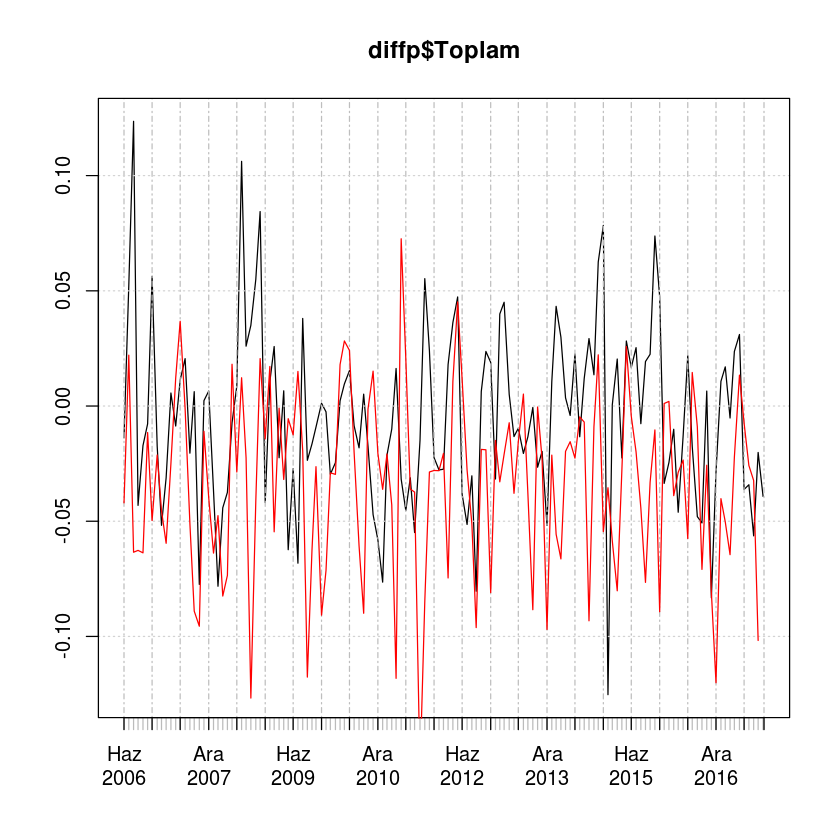

In [123]:
plot(diffp$Toplam,type="l")
lines(diffp$enf*5,col="red")

In [37]:
a1<-drop(diffp[1:138,2])
a2<-drop(diffp[1:138,5])

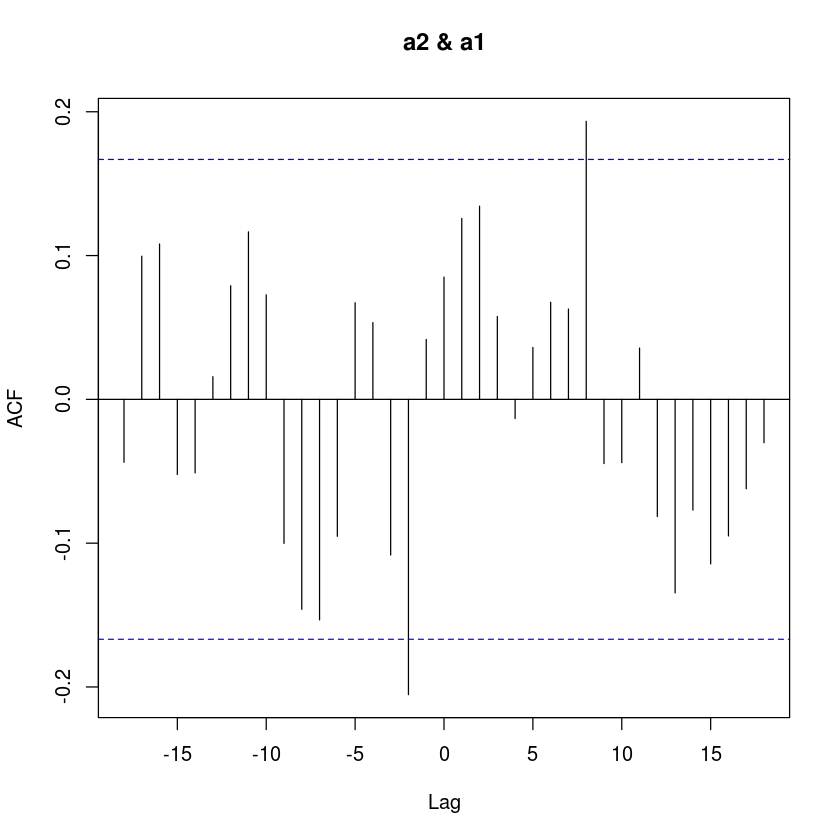

In [38]:
ccf(a2,a1, na.action=na.pass)